In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snd

In [5]:
zomato=pd.read_csv('zomato.csv')
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
zomato.drop(['Restaurant ID','Longitude','Latitude','Locality Verbose','Switch to order menu','Rating color'],axis=1,inplace=True)

In [8]:
zomato.shape

(9551, 15)

In [9]:
### Duplicate Sum
zomato.duplicated().sum()

0

In [10]:
### check for null value
zomato.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
dtype: int64

In [11]:
### remove null value 
zomato.dropna(how='any',inplace=True)
zomato.shape

(9542, 15)

In [12]:
zomato.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating text', 'Votes'],
      dtype='object')

In [13]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   Country Code          9542 non-null   int64  
 2   City                  9542 non-null   object 
 3   Address               9542 non-null   object 
 4   Locality              9542 non-null   object 
 5   Cuisines              9542 non-null   object 
 6   Average Cost for two  9542 non-null   int64  
 7   Currency              9542 non-null   object 
 8   Has Table booking     9542 non-null   object 
 9   Has Online delivery   9542 non-null   object 
 10  Is delivering now     9542 non-null   object 
 11  Price range           9542 non-null   int64  
 12  Aggregate rating      9542 non-null   float64
 13  Rating text           9542 non-null   object 
 14  Votes                 9542 non-null   int64  
dtypes: float64(1), int64(

In [14]:
zomato['Country Code'].value_counts()
## maximum resturant located in india 

1      8652
216     425
215      80
189      60
30       60
214      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [32]:
th25 = np.percentile(zomato['Average Cost for two'], q=[ 25])

city_with_cheap = zomato[['Average Cost for two','City']][zomato['Country Code']==1]
city_with_cheap.sort_values(by='Average Cost for two',ascending=False,inplace=True)
city_with_cheap[city_with_cheap['Average Cost for two']<=th25[0]].value_counts()

# zomato['Average Cost for two'].value_counts().index

Average Cost for two  City      
200                   New Delhi     479
250                   New Delhi     336
150                   New Delhi     264
100                   New Delhi     262
200                   Gurgaon        87
                      Noida          84
250                   Noida          47
                      Gurgaon        39
150                   Gurgaon        36
                      Noida          36
100                   Noida          30
50                    New Delhi      23
200                   Faridabad      21
100                   Faridabad      20
                      Gurgaon        14
150                   Faridabad      10
250                   Faridabad       9
                      Nagpur          3
0                     Agra            3
120                   New Delhi       3
150                   Ghaziabad       2
0                     Kanpur          2
                      Varanasi        2
100                   Amritsar        2
250    

ValueError: shape mismatch: objects cannot be broadcast to a single shape

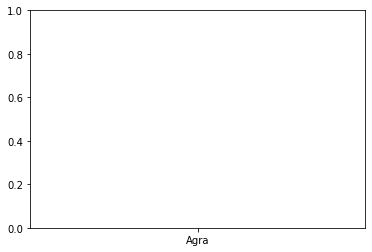

In [61]:
# zomato[zomato['Country Code']==1]['Average Cost for two'].unique()

# zomato[zomato['Country Code']==1]['City'].unique().tolist()
plt.bar(zomato[zomato['Country Code']==1]['City'].unique().tolist(),zomato[zomato['Country Code']==1]['Average Cost for two'].unique().tolist())



In [38]:
zomato['Average Cost for two'].describe()

count      9542.000000
mean       1200.326137
std       16128.743876
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

In [39]:
### move to next integer value that is rating
### check unique values
zomato['Aggregate rating'].unique()



array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [74]:
zomato['Aggregate rating'].describe()


count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [75]:
zomato['Votes'].describe()

count     9542.000000
mean       156.772060
std        430.203324
min          0.000000
25%          5.000000
50%         31.000000
75%        130.000000
max      10934.000000
Name: Votes, dtype: float64

In [76]:
zomato['Has Online delivery'].head()
zomato['Has Online delivery'].value_counts()

No     7091
Yes    2451
Name: Has Online delivery, dtype: int64

In [77]:
###convert yes to True and No to false
zomato['Has Online delivery'].replace(('Yes','No'),(True,False),inplace=True)
zomato['Has Table booking'].replace(('Yes','No'),(True,False),inplace=True)


In [78]:
zomato.head()

,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),True,False,No,3,4.8,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),True,False,No,3,4.5,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),True,False,No,4,4.4,Very Good,270
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),False,False,No,4,4.9,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),True,False,No,4,4.8,Excellent,229


In [79]:
def encde(zo):
    for col in zo.columns[~zo.columns.isin(['Aggregate rating','Average Cost for two','Votes'])]:
        zo[col]=zo[col].factorize()[0]
    return zo  
zomato_encode=encde(zomato.copy())    
zomato_encode    

,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,0,0,0,0,0,0,1100,0,0,0,0,0,4.8,0,314
1,1,0,0,1,1,1,1200,0,0,0,0,0,4.5,0,591
2,2,0,1,2,2,2,4000,0,0,0,0,1,4.4,1,270
3,3,0,1,3,3,3,1500,0,1,0,0,1,4.9,0,365
4,4,0,1,4,3,4,1500,0,0,0,0,1,4.8,0,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,7432,14,139,8905,1202,943,80,11,1,0,0,0,4.1,1,788
9547,7433,14,139,8906,1203,1823,105,11,1,0,0,0,4.2,1,1034
9548,7434,14,139,8907,1204,1824,170,11,1,0,0,1,3.7,2,661
9549,7435,14,139,8908,1204,1820,120,11,1,0,0,1,4.0,1,901


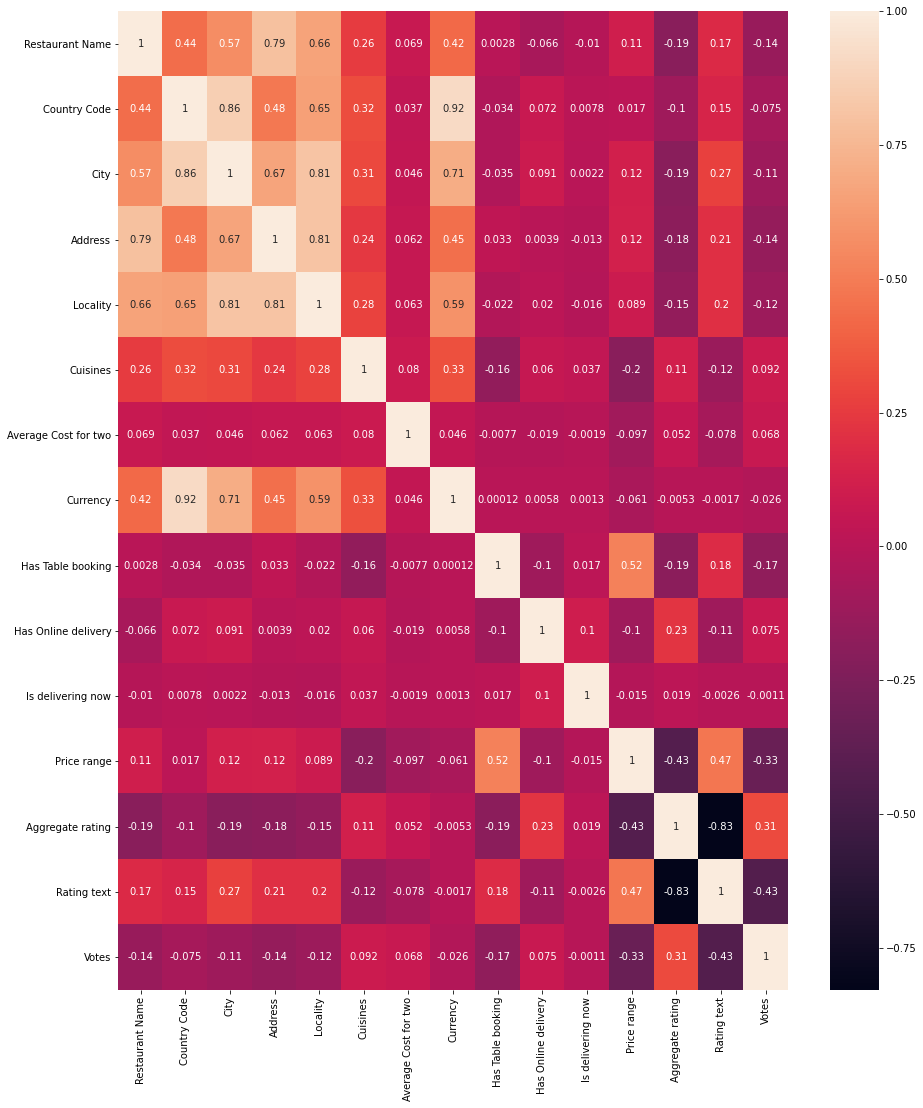

In [80]:
plt.figure(figsize=(15,18))
snd.heatmap(zomato_encode.corr(),annot=True)
plt.show()

<AxesSubplot:>

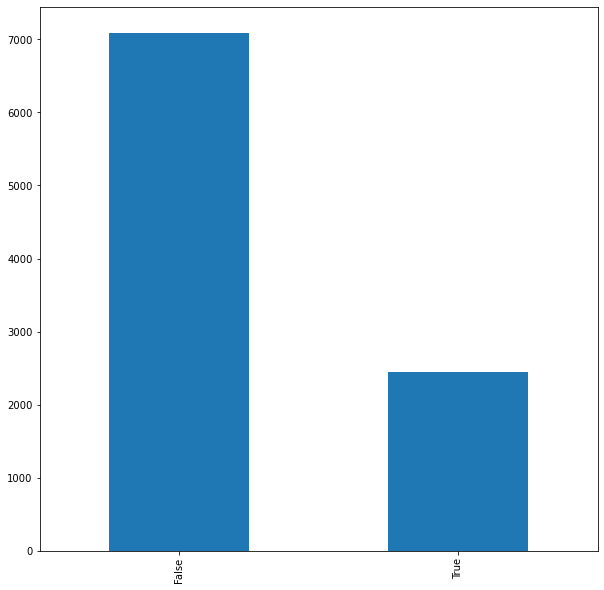

In [81]:
# zomato['Has Online delivery'].value_counts()
plt.figure(figsize=(10,10))
zomato['Has Online delivery'].value_counts().plot(kind='bar')

<AxesSubplot:>

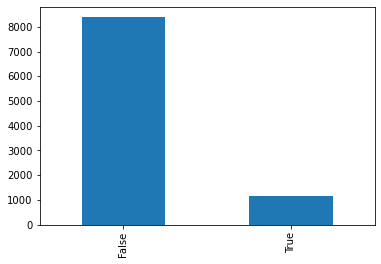

In [82]:
zomato['Has Table booking'].value_counts().plot(kind='bar')

In [118]:
### plot b/w rating and online online delivery
# zomato
case1=zomato[zomato['Has Table booking']==True].groupby('Aggregate rating')['Has Table booking'].count()
case2=zomato[zomato['Has Table booking']==False].groupby('Aggregate rating')['Has Table booking'].count()


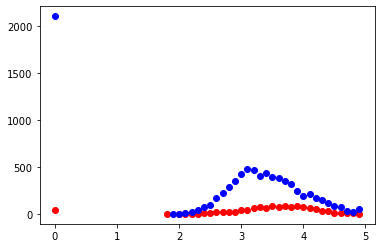

In [121]:
plt.scatter(case1.index.tolist(),case1.tolist(),c='red')
plt.scatter(case2.index.tolist(),case2.tolist(),c='blue')


In [122]:
#Above plotnshow resturnt has 0 rating not delivery online 
# there is no strong relation b/w rating and Has Table booking